# Data Science - QM II (Part 1)

### Quantitative Methoden II

###### -Chris Preuss (836597)

###### -Dozenten: Prof. Dr. Reiner Kurzhals 

###### 12/05/2017

# Bank Loan Calculations

In [6]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df1 = pd.read_csv('loans_data.csv', index_col=0)

df1.head()

,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,City,Country,CreditScoreEsEquifaxRisk,DateOfBirth,DebtToIncome,Education,...,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted,DefaultDate
ID,,,,,,,,,,,,,,,,,,,,,
0,Current,5000.0,12,4,AESPA,EE,NaN,1975-11-21,51.52,4.0,...,4.0,False,1,8.0,0,1.0,15To25Years,0.0957,False,NaN
2,Repaid,530.0,14,2,PÄRNU,EE,NaN,1969-10-25,30.32,4.0,...,1.0,True,0,1.0,2,4.0,15To25Years,0.1034,False,NaN
3,Current,5500.0,22,4,TALLINN,EE,NaN,1965-11-22,29.57,4.0,...,4.0,True,0,13.0,2,3.0,MoreThan25Years,0.0772,False,NaN
4,Repaid,6900.0,15,3,KEHTNA,EE,NaN,1983-12-05,45.75,2.0,...,3.0,False,1,19.0,7,4.0,5To10Years,0.0773,False,NaN
5,Current,2655.0,10,3,KIVIÕLI,EE,NaN,1980-07-13,25.40,4.0,...,3.0,True,0,17.0,2,4.0,5To10Years,0.1898,False,NaN


In [7]:
cols = list(df1)
cols.insert(0, cols.pop(cols.index('LoanDate')))
cols.insert(1, cols.pop(cols.index('Interest')))

df1 = df1.ix[:, cols]
df1 = df1.sort_values(by='LoanDate', ascending=False)
#df = df.append(df.sum(numeric_only=True), ignore_index=True)

df1.LoanDate = pd.to_datetime(df1['LoanDate'], format="%d/%m/%Y")

#Changes Boolean values (True/False) to binary values (True=1, False=0)
df1['Defaulted'] = df1['Defaulted'].astype(int)

#Fills empty cells with 0
df1.fillna(value=0, inplace=True)

#Sets LoanDate as index
df2 = df1.set_index('LoanDate')

#Calculates the monthly average values
df3= df2.resample('M').mean()

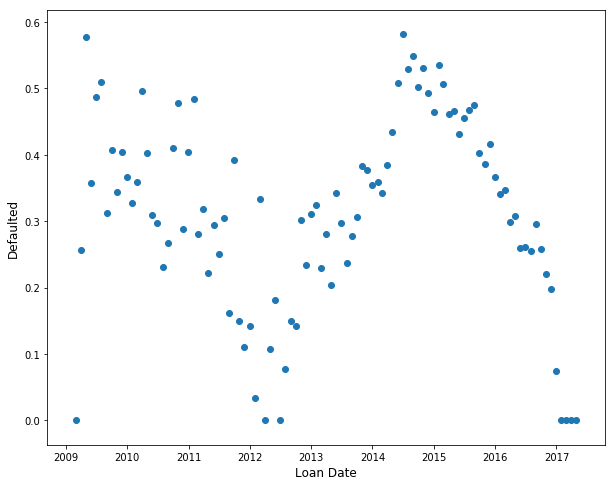

In [8]:
x = np.array(df3.index.tolist()) 
y = np.array(df3.Defaulted.tolist(), dtype=np.float) 

fig = plt.figure(figsize=(10, 8))
plt.scatter(x,y)

fig.suptitle(' ', fontsize=14)
plt.xlabel('Loan Date', fontsize=12)
plt.ylabel('Defaulted', fontsize=12)

plt.show()

In [9]:
#Sampling: 
# separate Testdata and Validation
df_07 = df2.sample(frac=0.7)
df_rest = df2.loc[~df2.index.isin(df_07.index)]
df_07.head()

,Interest,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,City,Country,CreditScoreEsEquifaxRisk,DateOfBirth,DebtToIncome,...,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted,DefaultDate
LoanDate,,,,,,,,,,,,,,,,,,,,,
2017-04-13,16.58,Current,2335.0,17,5,Haapsalu linn,EE,0,1991-07-10,54.00,...,1.0,True,0,1.0,0,4.0,LessThan2Years,0.1074,0,0
2013-02-22,28.00,Late,1400.0,13,6,TARTU,EE,0,1978-10-29,0.00,...,3.0,True,0,6.0,7,4.0,LessThan2Years,0.0619,1,2013-06-26
2016-11-28,32.04,Current,530.0,14,2,AHJA VALD,EE,0,1985-01-21,11.25,...,3.0,False,1,3.0,7,1.0,5To10Years,0.2311,0,0
2016-07-04,25.78,Current,4780.0,9,2,TALLINN,EE,0,1987-11-16,40.60,...,1.0,True,0,9.0,7,4.0,2To5Years,0.1970,0,0
2015-05-11,40.40,Repaid,700.0,20,6,SANTA CRUZ DE TENERIFE,ES,B,1985-02-07,25.30,...,3.0,True,0,8.0,7,3.0,10To15Years,0.1887,0,0


### Frequency of Loans

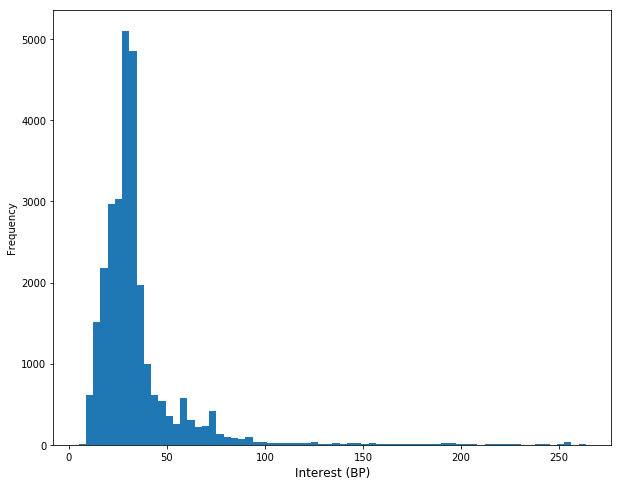

In [10]:
co = df1.Interest
#print (co)
fig = plt.figure(figsize=(10, 8))
co.plot.hist(stacked=True, bins=70)
plt.xlabel('Interest (BP)', fontsize=12)
plt.show()

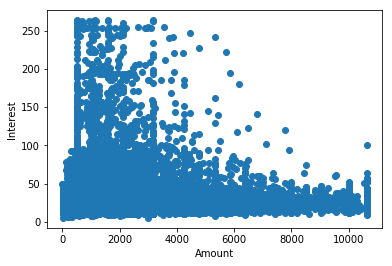

In [16]:
#Scatterplot comparing interest rates and loan amount
plt.scatter(df2.Amount, df2.Interest)
plt.xlabel('Amount')
plt.ylabel('Interest')

--> Seemingly very weak correlation

In [20]:
# fit a linear regression model

linreg = LinearRegression()
feature_cols = ['Amount']
X = df2[feature_cols]
y = df2.Interest
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
## make predictions for all values of X
df2['Amount_pred'] = linreg.predict(X)
df2.head()

,Interest,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,City,Country,CreditScoreEsEquifaxRisk,DateOfBirth,DebtToIncome,...,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted,DefaultDate,Amount_pred
LoanDate,,,,,,,,,,,,,,,,,,,,,
2016-12-31,29.37,Current,740.0,21,6,Mõniste vald,EE,0,1995-04-08,10.68,...,True,0,17.0,2,4.0,2To5Years,0.2021,0,0,37.072165
2016-12-31,24.43,Current,1060.0,2,7,Rae vald,EE,0,1986-04-15,12.75,...,False,1,10.0,6,3.0,10To15Years,0.1808,0,0,36.619039
2016-12-31,21.87,Current,5315.0,14,7,Paide,EE,0,1991-04-22,39.85,...,False,3,3.0,2,3.0,5To10Years,0.1700,0,0,30.593889
2016-12-31,87.73,Late,1865.0,12,7,Benissa,ES,B,1990-03-09,10.38,...,True,0,7.0,1,1.0,5To10Years,0.4846,0,0,35.479146
2016-12-31,13.99,Current,530.0,12,7,Tallinn,EE,0,1992-06-25,51.14,...,False,1,1.0,7,4.0,LessThan2Years,0.0785,0,0,37.369528


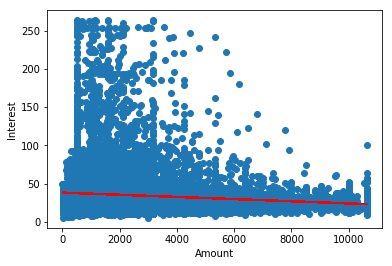

In [22]:
# put the plots together
plt.scatter(df2.Amount, df2.Interest)
plt.plot(df2.Amount, df2.Amount_pred, color='red')
plt.xlabel('Amount')
plt.ylabel('Interest')

### Interpretation of linear regression coefficients

Linear regression equation: $y = \beta_0 + \beta_1x$

In [23]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([ 38.1171849])

In [24]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([ 38.1171849])

In [25]:
# examine coefficient for al
print(feature_cols, linreg.coef_)

['Amount'] [-0.00141602]


**Interpretation:** A 1 unit increase in 'Amount' is associated with a -0.0014 unit decrease in 'Interest'.

In [26]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

In [27]:
# compute prediction for al=3 using the predict method
linreg.predict(3)

array([ 38.11576888])

# Predicting a Categorical Response (Loan Defaults)

In [131]:
# examine datafra,e (df2)
df1.Defaulted.value_counts().sort_index()

0    18637
1     9280
Name: Defaulted, dtype: int64

**18,637** have not defaulted, **9280** have defaulted

In [132]:
#df1 will be used again to compare the default rates of customers 
df1.head()

,LoanDate,Interest,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,City,Country,CreditScoreEsEquifaxRisk,DateOfBirth,...,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted,DefaultDate,Defaulted_pred,Defaulted_pred_class,Defaulted_pred_prop
ID,,,,,,,,,,,,,,,,,,,,,
30703,2016-12-31,29.37,Current,740.0,21,6,Mõniste vald,EE,0,1995-04-08,...,17.0,2,4.0,2To5Years,0.2021,0,0,0.327682,0,0.321684
30706,2016-12-31,24.43,Current,1060.0,2,7,Rae vald,EE,0,1986-04-15,...,10.0,6,3.0,10To15Years,0.1808,0,0,0.315378,0,0.310006
30714,2016-12-31,21.87,Current,5315.0,14,7,Paide,EE,0,1991-04-22,...,3.0,2,3.0,5To10Years,0.1700,0,0,0.309139,0,0.304175
30713,2016-12-31,87.73,Late,1865.0,12,7,Benissa,ES,B,1990-03-09,...,7.0,1,1.0,5To10Years,0.4846,0,0,0.490880,0,0.492695
30712,2016-12-31,13.99,Current,530.0,12,7,Tallinn,EE,0,1992-06-25,...,1.0,7,4.0,LessThan2Years,0.0785,0,0,0.256280,0,0.257372


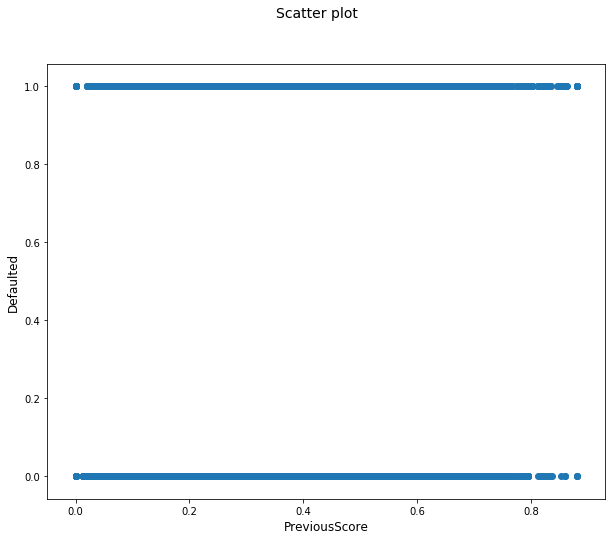

In [37]:
#Plotting the values
x = np.array(df1.PreviousScore.tolist()) 
y = np.array(df1.Defaulted.tolist(), dtype=np.float) 

fig = plt.figure(figsize=(10, 8))
plt.scatter(x,y)

fig.suptitle('Scatter plot', fontsize=14)
plt.xlabel('PreviousScore', fontsize=12)
plt.ylabel('Defaulted', fontsize=12)

plt.show()

Let's draw a **regression line**, like we did before:

In [44]:
# fit a linear regression model and store the predictions
feature_cols = ['PreviousScore']
X = df1[feature_cols]
y = df1.Defaulted
linreg.fit(X, y)
df1['Defaulted_pred'] = linreg.predict(X)
df1.head()

,LoanDate,Interest,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,City,Country,CreditScoreEsEquifaxRisk,DateOfBirth,...,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted,DefaultDate,Defaulted_pred
ID,,,,,,,,,,,,,,,,,,,,,
30703,2016-12-31,29.37,Current,740.0,21,6,Mõniste vald,EE,0,1995-04-08,...,True,0,17.0,2,4.0,2To5Years,0.2021,0,0,0.327682
30706,2016-12-31,24.43,Current,1060.0,2,7,Rae vald,EE,0,1986-04-15,...,False,1,10.0,6,3.0,10To15Years,0.1808,0,0,0.315378
30714,2016-12-31,21.87,Current,5315.0,14,7,Paide,EE,0,1991-04-22,...,False,3,3.0,2,3.0,5To10Years,0.1700,0,0,0.309139
30713,2016-12-31,87.73,Late,1865.0,12,7,Benissa,ES,B,1990-03-09,...,True,0,7.0,1,1.0,5To10Years,0.4846,0,0,0.490880
30712,2016-12-31,13.99,Current,530.0,12,7,Tallinn,EE,0,1992-06-25,...,False,1,1.0,7,4.0,LessThan2Years,0.0785,0,0,0.256280


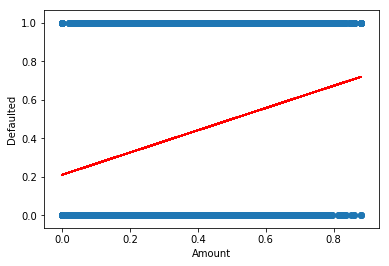

In [84]:
# scatter plot that includes the regression line
plt.scatter(df1.PreviousScore, df1.Defaulted)
plt.plot(df1.PreviousScore, df1.Defaulted_pred, color='red')
plt.xlabel('Amount')
plt.ylabel('Defaulted')

If **PreviousScore=0.6**, what class can be predicted for defaulted? **1**

If **PreviousScore=0.3**, what class can be predicted for defaulted? **0**

Predict the 0 class for **lower** values of PreviousScore, and the 1 class for **higher** values of PreviousScores. What's the cutoff value? Around **PreviousScore=0.4**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, if **defaulted_pred >= 0.5**, a class of **1** is predicted, else a class of **0**.

## $$h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

- $h_\beta(x)$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

### if $h_\beta(x)\le 0.5$ then $\hat y = 0$ 

### if $h_\beta(x)> 0.5$ then $\hat y = 1$ 

In [139]:
# understanding np.where
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], 
      dtype='<U5')

In [83]:
# transform Defaulted_pred to 1 or 0
df1['Defaulted_pred_class'] = np.where(df1.Defaulted_pred >= 0.5, 1, 0)
df1.head(10)

,LoanDate,Interest,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,City,Country,CreditScoreEsEquifaxRisk,DateOfBirth,...,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted,DefaultDate,Defaulted_pred,Defaulted_pred_class
ID,,,,,,,,,,,,,,,,,,,,,
30703,2016-12-31,29.37,Current,740.0,21,6,Mõniste vald,EE,0,1995-04-08,...,0,17.0,2,4.0,2To5Years,0.2021,0,0,0.327682,0
30706,2016-12-31,24.43,Current,1060.0,2,7,Rae vald,EE,0,1986-04-15,...,1,10.0,6,3.0,10To15Years,0.1808,0,0,0.315378,0
30714,2016-12-31,21.87,Current,5315.0,14,7,Paide,EE,0,1991-04-22,...,3,3.0,2,3.0,5To10Years,0.1700,0,0,0.309139,0
30713,2016-12-31,87.73,Late,1865.0,12,7,Benissa,ES,B,1990-03-09,...,0,7.0,1,1.0,5To10Years,0.4846,0,0,0.490880,0
30712,2016-12-31,13.99,Current,530.0,12,7,Tallinn,EE,0,1992-06-25,...,1,1.0,7,4.0,LessThan2Years,0.0785,0,0,0.256280,0
30709,2016-12-31,25.02,Late,1700.0,11,7,PÄRNU,EE,0,1994-02-15,...,1,1.0,7,3.0,2To5Years,0.1853,0,0,0.317977,0
30708,2016-12-31,20.80,Repaid,2230.0,9,7,Kohila Vald,EE,0,1977-07-28,...,4,7.0,0,3.0,10To15Years,0.1296,0,0,0.285800,0
30691,2016-12-31,13.17,Current,530.0,13,6,Tallinn,EE,0,1991-09-20,...,1,3.0,7,1.0,2To5Years,0.0497,0,0,0.239642,0
30695,2016-12-31,30.64,Current,10630.0,15,6,Võru linn,EE,0,1984-07-05,...,0,6.0,6,1.0,10To15Years,0.2185,0,0,0.337156,0


Now all the Defaulted_pred_class (default prediction) are either 1 or 0 (True= defaulted or False= not defaulted)

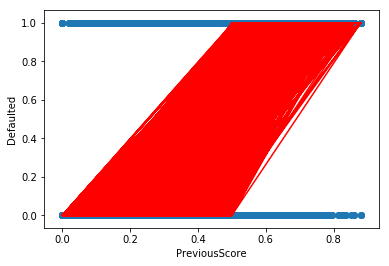

In [89]:
# plot the class predictions
plt.scatter(df1.PreviousScore, df1.Defaulted)
plt.plot(df1.PreviousScore, df1.Defaulted_pred_class, color='red')
plt.xlabel('PreviousScore')
plt.ylabel('Defaulted')

**Both values are binary, this leads to a strange looking graph**

$h_\beta(x)$ can be lower 0 or higher than 1, which is countra intuitive

## Logistic Regression 


In [112]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['PreviousScore']
X = df1[feature_cols]
y = df1.Defaulted
logreg.fit(X, y)
df1['Defaulted_pred_class'] = logreg.predict(X)

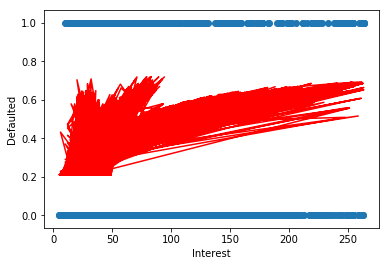

In [113]:
# plot the class predictions
plt.scatter(df1.Interest, df1.Defaulted)
plt.plot(df1.Interest, df1.Defaulted_pred, color='red')
plt.xlabel('Interest')
plt.ylabel('Defaulted')

**predicted probabilities** instead of just the **class predictions**

In [114]:
# store the predicted probabilites of class 1
df1['Defaulted_pred_prop'] = logreg.predict_proba(X)[:, 1]

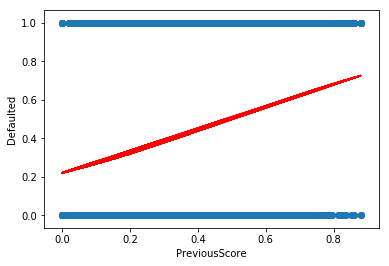

In [117]:
# plot the predicted probabilities
plt.scatter(df1.PreviousScore, df1.Defaulted)
plt.plot(df1.PreviousScore, df1.Defaulted_pred_prop, color='red')
plt.xlabel('PreviousScore')
plt.ylabel('Defaulted')

### Results in a better fit (The data is not optimal for the model).

In [119]:
# examine some example predictions
print(logreg.predict_proba(1))
print(logreg.predict_proba(2))
print(logreg.predict_proba(3))

[[ 0.21779363  0.78220637]]
[[ 0.02154143  0.97845857]]
[[ 0.00173774  0.99826226]]


The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

## Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [782]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


What is **e**? It is the base rate of growth shared by all continually growing processes:

In [786]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


## Logistic Regression: Summary

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for **binary classification problems** (two response classes). But what about **multi-class classification problems** (more than two response classes)?

- Most common solution for classification models is **"one-vs-all"** (also known as **"one-vs-rest"**): decompose the problem into multiple binary classification problems
- **Multinomial logistic regression** can solve this as a single problem

## Interpretation of Logistic Regression Coefficients

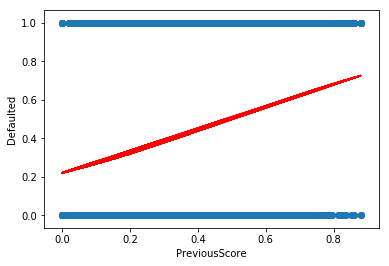

In [121]:
# plot the predicted probabilities again
plt.scatter(df1.PreviousScore, df1.Defaulted)
plt.plot(df1.PreviousScore, df1.Defaulted_pred_prop, color='red')
plt.xlabel('PreviousScore')
plt.ylabel('Defaulted')

In [122]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([ 3.81600045])

In [123]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([ 45.42217648])

In [124]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([ 0.97845857])

In [125]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1]

array([ 0.97845857])

In [126]:
# examine the coefficient for al
feature_cols, logreg.coef_[0]

(['PreviousScore'], array([ 2.53742983]))

**Interpretation:** A 1 unit increase in 'PreviousScore' is associated with a 4.18 unit increase in the log-odds of 'Defaulted'.

In [127]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.99205808391674566

In [128]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([ 0.99826226])

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [129]:
# examine the intercept
logreg.intercept_

array([-1.25885921])

**Interpretation:** For an 'PreviousScore' value of 0, the log-odds of 'Defaulted' is -7.71.

In [797]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.04553096])

0.04 --> Makes sense from the plot above, because the probability of Defaulted=1 should be very low for such a low 'PreviousScore' value.

![Logistic regression beta values](logit.gif)

in the Logit Model the $\beta_0$ line adjust better to **Binary values** (due to the odd ratio), whereas the **Linear regression** is a straight line and does not adjust according to probability (odds). For the credit risk (defaulted or no defaulted) a logistic regression is the better choice.

## Conclusion (Part 1): Comparing Logistic Regression with Other Models

Logistic regression is a very useful tool where the dependent variable is Binary or Dichotomous. That means the dependent variable can take only two possible values such as “Default or No Default”. The model is widely used in credit risk analysis and is a better than a linear regression (due to the binary nature of “Default or No Default”).

For further comparision (Advantages/Disadvantages) please consult the Powerpoint presentation.


##### „Ich versichern hiermit, dass ich die schriftliche Ausarbeitung der Präsentation, Selbstständig angefertigt, alle Hilfen und Hilfsmittel angegeben und alle wörtlichen oder im Sinne nach aus Veröffentlichungen oder andere Quellen, insbesondere dem Internet entnommenen Inhalte kenntlich gemacht haben.“